In [11]:
## Importing Data
# Use Gspread to import data from Google Sheets
import gspread
sa = gspread.service_account(filename="eoy-review-2022-319c16e29a10.json")
sheet = sa.open("2022 Daily checkup (Responses)")
worksheet = sheet.worksheet("rawdata")

In [12]:
# Looking at the data
import pandas as pd
import numpy as np
df = pd.DataFrame(worksheet.get_all_records())
df.head(2)

,Timestamp,Perasaan hari ini,"Dari 1-5, bagaimana hari ini?",Apa yang memberi energimu hari ini?,Apa yang menyerap energimu hari ini?,Value mana yang udah berhasil dijalanin hari ini?,Additional notes,Today's Title
0,1/2/2022 1:38:55,"Inspired, Tired, Senang/joyful, Pleasant",Sangat positif,- posting blogpost tentang EoY reflection with...,- telat makan\n- bangun kesiangan dan ga siap ...,"Self-agency and independence, Hanlon's Razor, ...",seneng deh bisa reconnecting sama temen2 karen...,
1,1/2/2022 22:32:40,"Pleasant, Confident, Interested/curious, Senan...",Sangat positif,- vibes mengawali tahun\n- after-effect dari p...,- prokras ga ngerjain personal statement ataup...,"Self-agency and independence, Continuous impro...",Kayanya emang lari membantu gue berpikir kalau...,


In [13]:
# Rename the columns
df.rename(columns = {"Timestamp": "time", "Perasaan hari ini": "feeling", "Dari 1-5, bagaimana hari ini?": "d_rating", "Apa yang memberi energimu hari ini?": "give_energy", "Apa yang menyerap energimu hari ini?": "drain_energy", "Value mana yang udah berhasil dijalanin hari ini?": "value", "Additional notes": "notes", "Today's Title": "title"}, inplace = True)
df.head(2)

,time,feeling,d_rating,Apa yang memberi energimu hari ini?,Apa yang menyerap energimu hari ini?,value,notes,title
0,1/2/2022 1:38:55,"Inspired, Tired, Senang/joyful, Pleasant",Sangat positif,- posting blogpost tentang EoY reflection with...,- telat makan\n- bangun kesiangan dan ga siap ...,"Self-agency and independence, Hanlon's Razor, ...",seneng deh bisa reconnecting sama temen2 karen...,
1,1/2/2022 22:32:40,"Pleasant, Confident, Interested/curious, Senan...",Sangat positif,- vibes mengawali tahun\n- after-effect dari p...,- prokras ga ngerjain personal statement ataup...,"Self-agency and independence, Continuous impro...",Kayanya emang lari membantu gue berpikir kalau...,


In [14]:
# Recode the daily rating to number
def recode_val(rating):
    if rating == "Sangat positif":
        return 5
    elif rating == "Positif":
        return 4
    elif rating == "Netral":
        return 3
    elif rating == "Negatif":
        return 2
    elif rating == "Sangat negatif":
        return 1

df['d_rating_val'] = df['d_rating'].apply(recode_val)
df['time']

0         1/2/2022 1:38:55
1        1/2/2022 22:32:40
2         1/4/2022 0:54:18
3        1/4/2022 23:43:18
4         1/6/2022 0:07:41
              ...         
317    12/30/2022 11:05:44
318     12/31/2022 7:48:07
319                       
320                       
321                       
Name: time, Length: 322, dtype: object

In [15]:
# Set the index to timestamp for easier subsetting
df['timestamp'] = pd.to_datetime(df['time'])
df = df.set_index('timestamp')

<AxesSubplot:title={'center':'Daily Rating in 2022'}, xlabel='Months of the year 2022', ylabel='Rating 1-5'>

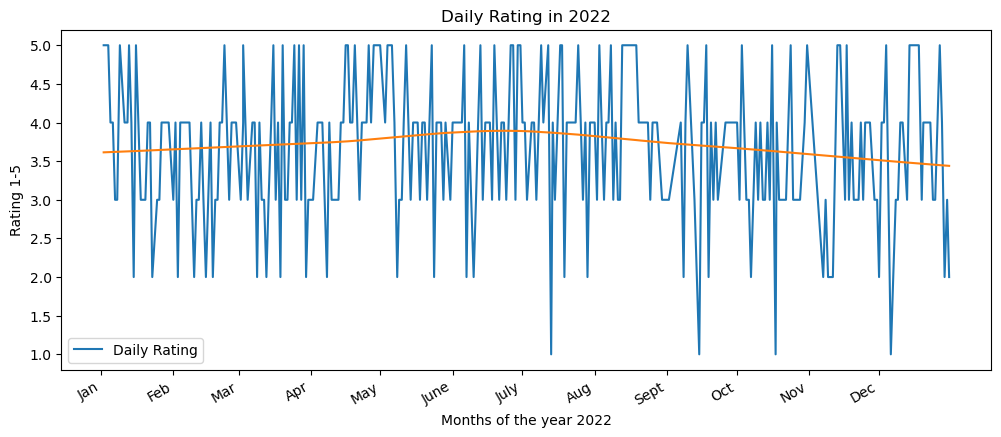

In [16]:
## Visualising the Daily Rating 
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize = (12, 5))

# Use seaborn lineplot
sns.lineplot(x = 'timestamp',
            y = 'd_rating_val',
            data = df,
            label = 'Daily Rating').set(title='Daily Rating in 2022')

plt.xlabel('Months of the year 2022')

# Setting customized ticklabels for x axis
pos = [ '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', 
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01']
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

plt.xticks(pos, lab)
plt.ylabel('Rating 1-5')

# Smoothen the plot using LOESS method
from statsmodels.nonparametric.smoothers_lowess import lowess

# This function is from https://gist.github.com/AllenDowney/818f6153ef316aee80467c51faee80f8
def make_lowess(series):
    endog = series.values
    exog = series.index.values

    smooth = lowess(endog, exog)
    index, data = np.transpose(smooth)

    return pd.Series(data, index=pd.to_datetime(index)) 


rating = make_lowess(df['d_rating_val'])
rating.plot(label='rating')

# The smoothed line never touched below 3.0! wow

In [17]:
## All feelings experienced
# Cleaning the feelings
feeling = list(df['feeling'])
all_feeling = ' '.join(feeling)

# Cleaning text from commas
clean = all_feeling.replace(',','')
word_list = clean.split()

# Count the most occuring feelings
d = {}
for key in word_list: 
    d[key] = d.get(key, 0) + 1

# Wordcount, sorted descending (by most frequent to least frequent)
wordcount = sorted(d.items(), key = lambda x: x[1], reverse = True)

<AxesSubplot:title={'center':'Feelings Word Count (ALL)'}, xlabel='count', ylabel='word'>

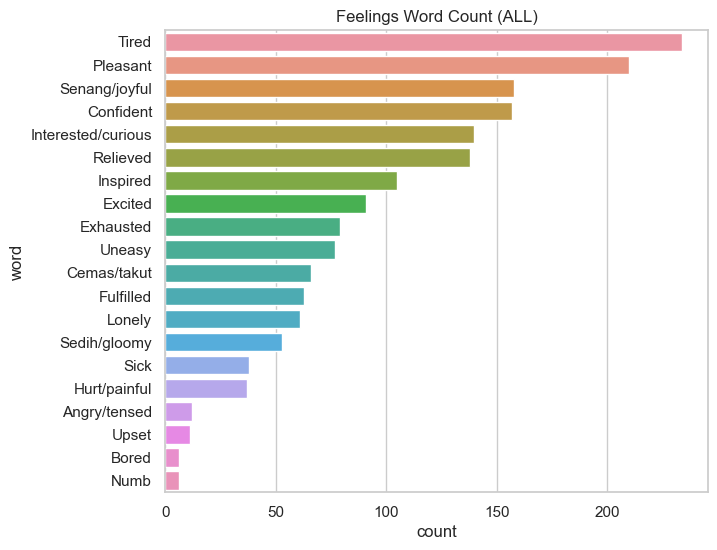

In [18]:
# Plotting the feelings
# Set themes
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Load the data and sort descending
wordcount_df = pd.DataFrame(wordcount, columns = ['word', 'count'])
wordcount_df = wordcount_df.sort_values('count', ascending = False).head(20)

# Create the plot using seaborn (sns)
plt.title('Feelings Word Count (ALL)')
sns.barplot(x = 'count',
           y = 'word',
            data =wordcount_df)

I have 4 worst days
I have 61 best days


<AxesSubplot:title={'center':'Feelings Word Count (worst)'}, xlabel='count', ylabel='word'>

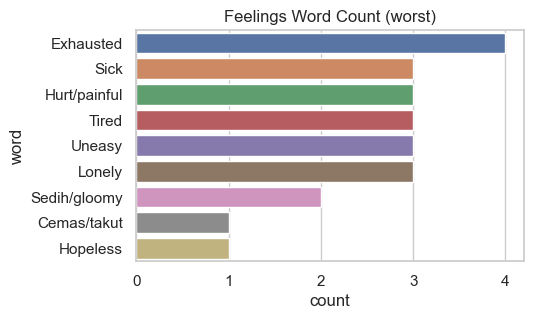

In [19]:
## Feelings during Best and Worst Days
# Count worst days
worst = df.loc[df['d_rating_val'] == 1]
worst_c = len(worst)
print('I have', worst_c, 'worst days') # I have 4 worst days

# Count best days
best = df.loc[df['d_rating_val'] == 5]
best_c = len(best)
print('I have', best_c, 'best days') # I have 4 worst days


# Feelings in Worst Days
# Cleaning the feelings
feeling_w = list(worst['feeling'])
w_feeling = ' '.join(feeling_w)

# Cleaning text from commas
clean_w = w_feeling.replace(',','')
w_feeling = clean_w.split()
w_feeling

# Count the most occuring feelings
d_w = {}
for key in w_feeling: 
    d_w[key] = d_w.get(key, 0) + 1

# Wordcount, sorted descending (by most frequent to least frequent)
worst_count = sorted(d_w.items(), key = lambda x: x[1], reverse = True)
worst_count

# Plotting the word count
# Set themes
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 3))

# Load the data and sort descending
worst_count_df = pd.DataFrame(worst_count, columns = ['word', 'count'])
worst_count_df.sort_values('count', ascending = False)

# Create the plot using seaborn (sns)
plt.title('Feelings Word Count (worst)')
sns.barplot(x = 'count',
           y = 'word',
            data = worst_count_df)

<AxesSubplot:title={'center':'Feelings Word Count (best)'}, xlabel='count', ylabel='word'>

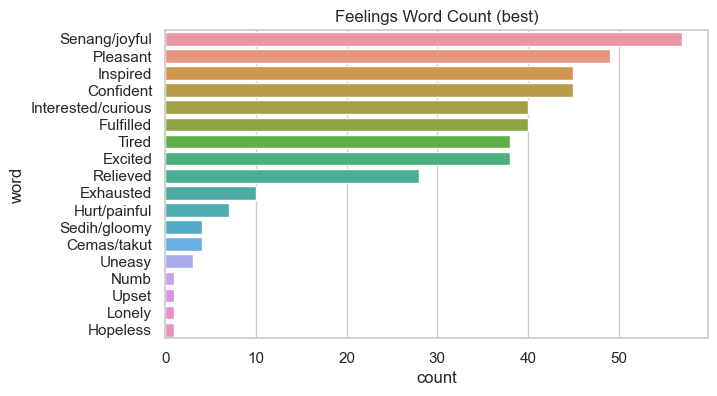

In [20]:
# Feelings in Best Days
# Cleaning the feelings
feeling_b = list(best['feeling'])
b_feeling = ' '.join(feeling_b)

# Cleaning text from commas
clean_b = b_feeling.replace(',','')
b_feeling = clean_b.split()
b_feeling

# Count the most occuring feelings
d_b = {}
for key in b_feeling: 
    d_b[key] = d_b.get(key, 0) + 1

# Wordcount, sorted descending (by most frequent to least frequent)
best_count = sorted(d_b.items(), key = lambda x: x[1], reverse = True)
best_count

# Plotting the word count
# Set themes
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 4))

# Load the data and sort descending
best_count_df = pd.DataFrame(best_count, columns = ['word', 'count'])
best_count_df.sort_values('count', ascending = False)

# Create the plot using seaborn (sns)
plt.title('Feelings Word Count (best)')
sns.barplot(x = 'count',
           y = 'word',
            data = best_count_df)

In [21]:
## Text Analysis from the Notes ##

In [25]:
# Tokenizing the notes
import string 
import re #regex library
import nltk

notes = pd.DataFrame(df, columns = ['notes'])
notes = notes.values.tolist()
notes = str(sum(notes, []))

# Cleaning the notes by replacing letters using for-loop
for char in '-.,\n\\\\':
    notes = notes.replace(char,'')
notes = notes.lower()
notes

clean_notes = notes.split()
clean_notes

# Word count
wordcount = nltk.FreqDist(clean_notes)

# Sort by the most common
wordcount.most_common(5)

# I still can't figure on how to clean the \n

[('gue', 577), ('dan', 387), ('bisa', 338), ('ini', 239), ('gak', 216)]

In [26]:
# Solution: use nltk library
# Tokenizing the words using nltk library
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist # LOL I just realised there's this function from this library
notes = pd.DataFrame(df, columns = ['notes'])
notes = notes.values.tolist()
notes = str(sum(notes, []))

# Cleaning the notes using regex
# Lower case
lower = notes.lower()
# Remove numbers
r_number = re.sub(r"\d+", "", lower)
# Remove punctuation
r_punc = r_number.translate(str.maketrans("","",string.punctuation))
# Remove whitespace leading & trailing
r_strip = r_punc.strip()
# Remove multiple whitespace into single whitespace
r_strip = re.sub('\s+',' ',r_strip)

# Tokenizing
tokens = nltk.tokenize.word_tokenize(r_strip)

# Word count
wordcount = nltk.FreqDist(tokens)

# Sort by the most common
wordcount.most_common(5)


[('gue', 644), ('dan', 387), ('bisa', 341), ('ini', 244), ('gak', 217)]

In [ ]:
# But this word count does not mean anything meaningful, we might want to try stemming them!
# Let's use Sastrawi to stem the words
# import Sastrawi package

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stem
sentence = r_strip
output   = stemmer.stem(sentence)

# Tokenizing
tokens = nltk.tokenize.word_tokenize(output)

# Word count
wordcount = nltk.FreqDist(tokens)

# Sort by the most common
print(wordcount.most_common()) # it will take a long time. note: it is not useful! let's try to use bigram / trigram



In [30]:
# Trying to count the bigram and trigram instead
from sklearn.feature_extraction.text import CountVectorizer

# code from kaggle: https://www.kaggle.com/code/rowhitswami/starter-load-stopwords/notebook
def get_stopwords_list(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(frozenset(stop_set))

# I created my own stopwords from last year's EoY and also with a little adjustment. 
# I mixed bahasa Indonesia and English in my journal entries
stopwords_path = "/Users/lasmimarbun/Documents/EoY review 2022/my-stopwords2.txt"
stopwords = get_stopwords_list(stopwords_path)
len(stopwords) # There are 49 stop words


49

In [31]:
# Some rough numbers for contextual knowledge
print(len(df['notes']))
# We have 322 rows of data

print(len(tokens))
# We have 15,262 tokens of words

322
15262


In [32]:
## Bigram and Trigram analysis
# Notes: pardon my inefficient codes, I just want to get it done );

# Creating the ngrams
c_vec2 = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
c_vec3 = CountVectorizer(stop_words=stopwords, ngram_range=(3,4))

# Matrix of ngrams
ngrams2 = c_vec2.fit_transform(df['notes'])
ngrams3 = c_vec3.fit_transform(df['notes'])

# count frequency of ngrams
count_values2 = ngrams2.toarray().sum(axis=0)
count_values3 = ngrams3.toarray().sum(axis=0)

# list of ngrams
vocab2 = c_vec2.vocabulary_
vocab3 = c_vec3.vocabulary_

# Create the dataframe
df_ngram2 = pd.DataFrame(sorted([(count_values2[i],k) for k,i in vocab2.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram3 = pd.DataFrame(sorted([(count_values3[i],k) for k,i in vocab3.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

print(df_ngram2.head())
print(df_ngram3.head())

# The notes are about myself ('diri sendiri') and being able/wishing to be able ('bisa') and happiness ('seneng')

   frequency        bigram
0         27  diri sendiri
1         20   semoga bisa
2         19   seneng bisa
3         17   pengen bisa
4         16    bisa lebih
   frequency             trigram
0          4    sisi lain pengen
1          4    seneng hari bisa
2          4  fokus diri sendiri
3          3   supaya bisa lebih
4          3   semoga besok bisa


In [33]:
# But then, what if we can know the topic of these notes?
# Clustering the notes, tutorial on: https://0-link-springer-com.pugwash.lib.warwick.ac.uk/chapter/10.1007/978-1-4842-4354-1_7#Sec27

## K-means clustering using Count Vectorizer Matrix

# Step 1: Feature engineering
# Only grab words that occur at least in 10 days and maximum of 80% of all days and remove the stopwords
cv = CountVectorizer(ngram_range=(2, 3), min_df=10, max_df=0.8, stop_words=stopwords )

list_notes = list(df['notes'])
cv_matrix = cv.fit_transform(list_notes)
print(cv_matrix.shape)
# We have a total of 322 days and 11 features

# Step 2: K-means clustering
# Use k-means clustering from sklearn. For K-means, we have to decide the number of clusters first and iterate to see which number performs the best
from sklearn.cluster import KMeans
NUM_CLUSTERS = 4
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=50,
       random_state=2022, tol=0.0001, verbose=0)
df['kmeans_cluster'] = km.labels_

# Step 3: Viewing distribution of days across the clusters
from collections import Counter
Counter(km.labels_)

(322, 11)


Counter({2: 19, 1: 264, 0: 21, 3: 18})

In [36]:
# Now time to see the title and the valence rating for each day
day_clusters = (df[['title', 'kmeans_cluster', 'd_rating_val', 'notes']]
                  .sort_values(by=['kmeans_cluster', 'd_rating_val'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))

# I still don't understand why they are grouped that way
# We can actually showcase important features as the basis to create the cluster of days
day_clusters = day_clusters.copy(deep=True) # copying the data so modifications will not be reflected in the original object
feature_names = cv.get_feature_names_out() # cv is from the previous count vectorizer
topn_features = 10
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get days belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index]
                        for index in ordered_centroids[cluster_num, :topn_features]]
    title = day_clusters[day_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    rating = day_clusters[day_clusters['kmeans_cluster'] == cluster_num]['d_rating_val'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('-'*100)
    print('Key Features:', key_features)
    print('Rating:', rating)
    print('Title:', title)
    print('='*100)

# but too many "bisa", however since we used 2-3 ngrams as a feature and we only have 11 features, we might want to look only at the top one

# Cluster 1 is about self-improvement ('diri sendiri', 'bisa lebih')
# Cluster 2 is about a wish and good days in the early 2022 where I wasn't putting the titles
# Cluster 3 is about a achievement ('seneng bisa', 'udah bisa')
# Cluster 4 is about achieving something ('semoga bisa', 'bisa dapet') after some hassles (looking at the day rating, we have a mix of good and bad days)



CLUSTER #1
----------------------------------------------------------------------------------------------------
Key Features: ['diri sendiri', 'bisa lebih', 'udah bisa', 'supaya bisa', 'pengen bisa', 'my own', 'sisi lain', 'bisa dapet', 'banget bisa', 'seneng bisa']
Rating: [5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0]
Title: ['Birthday! Sashimi and sake celebration', 'Good Morning Run and the Urge to Learn New Languages', 'Trip to London!!', 'A (Good) Long Day to Reconnect ', '', '', '', '', '', '', '', '', '', 'Trying Dance dengan Sobatsehat', 'Kinda Rest Day Before the Weekend', 'Walk + Run Day :)', '', '', '', '']
CLUSTER #2
----------------------------------------------------------------------------------------------------
Key Features: ['pengen bisa', 'sisi lain', 'supaya bisa', 'bisa lebih', 'my own', 'banget bisa', 'bisa dapet', 'udah bisa', 'seneng bisa', 'semoga bisa']
Rating: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,

Text(0, 0.5, '')

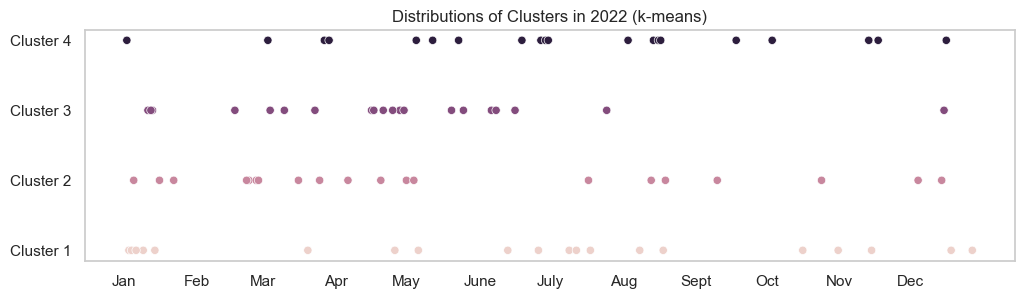

In [91]:
# Use seaborn scatterplot to see the distribution of the cluster in the timeseries
# set figure size
plt.figure(figsize = (12, 3))

# set style, more on styling: http://gree2.github.io/python/2015/05/05/python-seaborn-tutorial-controlling-figure-aesthetics
sns.set_style('whitegrid', {'axes.grid' : False})

sns.scatterplot(x = 'timestamp',
            y = 'kmeans_cluster',
            data = day_clusters,
            hue = 'kmeans_cluster',
            legend = None,
            label = 'Cluster').set(title='Distributions of Clusters in 2022 (k-means)')

# setting customized ticklabels for x axis
pos = [ '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', 
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01']
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

pos_y = [0, 1, 2, 3]
lab_y = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.xticks(pos, lab)
plt.yticks(pos_y, lab_y)

# Remove labels to not overexplain
plt.xlabel('')
plt.ylabel('')

In [79]:
# Trying other method of clustering
## K-means clustering using Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=2022).fit(cosine_sim_features)


df['kmeans_cluster'] = km.labels_
Counter(km.labels_) # the proportion is the same as k-means

day_clusters = day_clusters.copy(deep=True)
day_clusters = (df[['title', 'kmeans_cluster', 'd_rating_val']]
                  .sort_values(by=['kmeans_cluster', 'd_rating_val'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
day_clusters = day_clusters.copy(deep=True)
# get title belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    title = day_clusters[day_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    rating = day_clusters[day_clusters['kmeans_cluster'] == cluster_num]['d_rating_val'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('-'*100)
    print('Key Features:', key_features)
    print('Rating:', rating)
    print('Title:', title)
    print('='*100)
    
# The clusters are the same with using Count Vector Matrix (cv_matrix)

CLUSTER #1
----------------------------------------------------------------------------------------------------
Key Features: ['semoga bisa', 'bisa dapet', 'supaya bisa', 'bisa lebih', 'udah bisa', 'my own', 'sisi lain', 'seneng bisa', 'pengen bisa', 'diri sendiri', 'banget bisa']
Rating: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0]
Title: ['', '', '', '', '', '', 'Long Run and Future Freelancing Project', 'A Date With Myself and Lots of Reflection', 'Pergi Ngantor dan Ekskul Lari', 'Birthday! Sashimi and sake celebration', 'Canyoneering di Cikondang', 'Perdana HM di CFD!!', 'Paragliding and GWK!', 'First Park Run and Fulfilling Day! :D', 'Trip to Stonehenge and Old Sarum in Salisbury!', 'Birmingham Christmas Market', 'Day 2 desert trip in Merzouga', 'Isle of Skye Nature Sightseeing', '', '']
CLUSTER #2
----------------------------------------------------------------------------------------------------
Key Features: ['semoga bisa'

In [153]:
# Trying other method of clustering

## Affinity Propagation
# Feature engineering
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stopwords)
list_notes = list(df['notes'])
cv_matrix = cv.fit_transform(list_notes)
print(cv_matrix.shape)

# Affinity Propagation
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000, verbose=True, damping=0.5, random_state = 2022) # need to change the damping factor from default 0.5 to 0.9 to make it converge
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10) # usually this method results in >10 clusters, so use this to get only the 10 top clusters


(322, 205)
Converged after 90 iterations.


[(17, 44),
 (5, 17),
 (26, 17),
 (12, 16),
 (0, 15),
 (21, 15),
 (3, 14),
 (2, 13),
 (19, 13),
 (1, 12)]

In [154]:
filtered_clusters

[17, 5, 26, 12, 0, 21]

In [157]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(6)] # get the top 6 clusters
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
day_clusters = (filtered_df[['title', 'affprop_cluster', 'd_rating_val']]
                  .sort_values(by=['affprop_cluster', 'd_rating_val'],
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
day_clusters = day_clusters.copy(deep=True)

# get key features for each cluster
# get title belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    title = day_clusters[day_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    rating = day_clusters[day_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['d_rating_val'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('-'*100)
    print('Rating:', rating)
    print('Title:', title)
    print('='*100)

CLUSTER #17
----------------------------------------------------------------------------------------------------
Rating: [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Title: ['', '', '', 'Morning Run + Kintamani view!', 'Impromptu Sleepover di rumah Nisa :D', 'Walking to two castles and having Divali night', 'First day in Morocco', '', '', '', '', '', '', '', 'Wisata Kantor dan Lari', 'Cobain Kaos Pocari buat Dipake Lari', 'Going Back to Reality', 'Main ke rumah Sania', 'Hangout with MBBM people', 'Makan2 di rumah Sesar']
CLUSTER #5
----------------------------------------------------------------------------------------------------
Rating: [5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0]
Title: ['', '', 'Productive Day Began with a Walk and Ends with Tennis', '', '', '', '', '', 'Conquering that Meeting!! + Pain from Canyoneering', 'Doing Homework All The Time (TM) but Started with a Good Run', 

Text(0, 0.5, '')

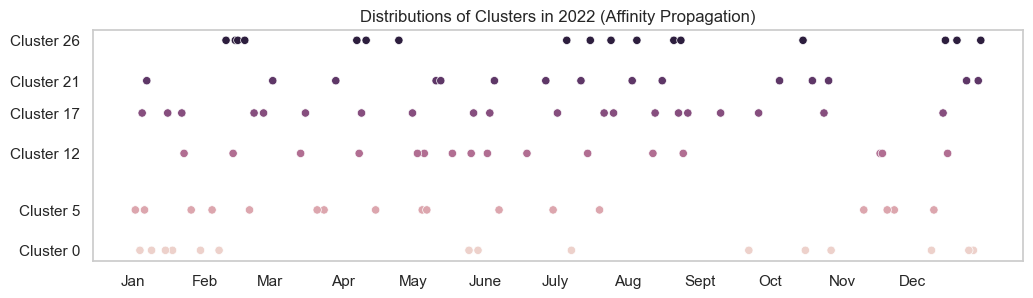

In [158]:
# Use seaborn scatterplot to see the distribution of the cluster in the timeseries
# set figure size
plt.figure(figsize = (12, 3))

# set style, more on styling: http://gree2.github.io/python/2015/05/05/python-seaborn-tutorial-controlling-figure-aesthetics
sns.set_style('whitegrid', {'axes.grid' : False})

sns.scatterplot(x = 'timestamp',
            y = 'affprop_cluster',
            data = day_clusters,
            hue = 'affprop_cluster',
            legend = None,
            label = 'Cluster').set(title='Distributions of Clusters in 2022 (Affinity Propagation)')

# setting customized ticklabels for x axis
pos = [ '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', 
       '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
       '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01']
  
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

pos_y = [17, 5, 26, 12, 0, 21] # number of clusters from the analysis 
lab_y = ['Cluster 17', 'Cluster 5', 'Cluster 26', 'Cluster 12', 'Cluster 0', 'Cluster 21']

plt.xticks(pos, lab)
plt.yticks(pos_y, lab_y)

# Remove labels to not overexplain
plt.xlabel('')
plt.ylabel('')

# For next time: to build topic models on each cluster and see what kind of topics you can extract from each cluster that would make a better representation of each cluster

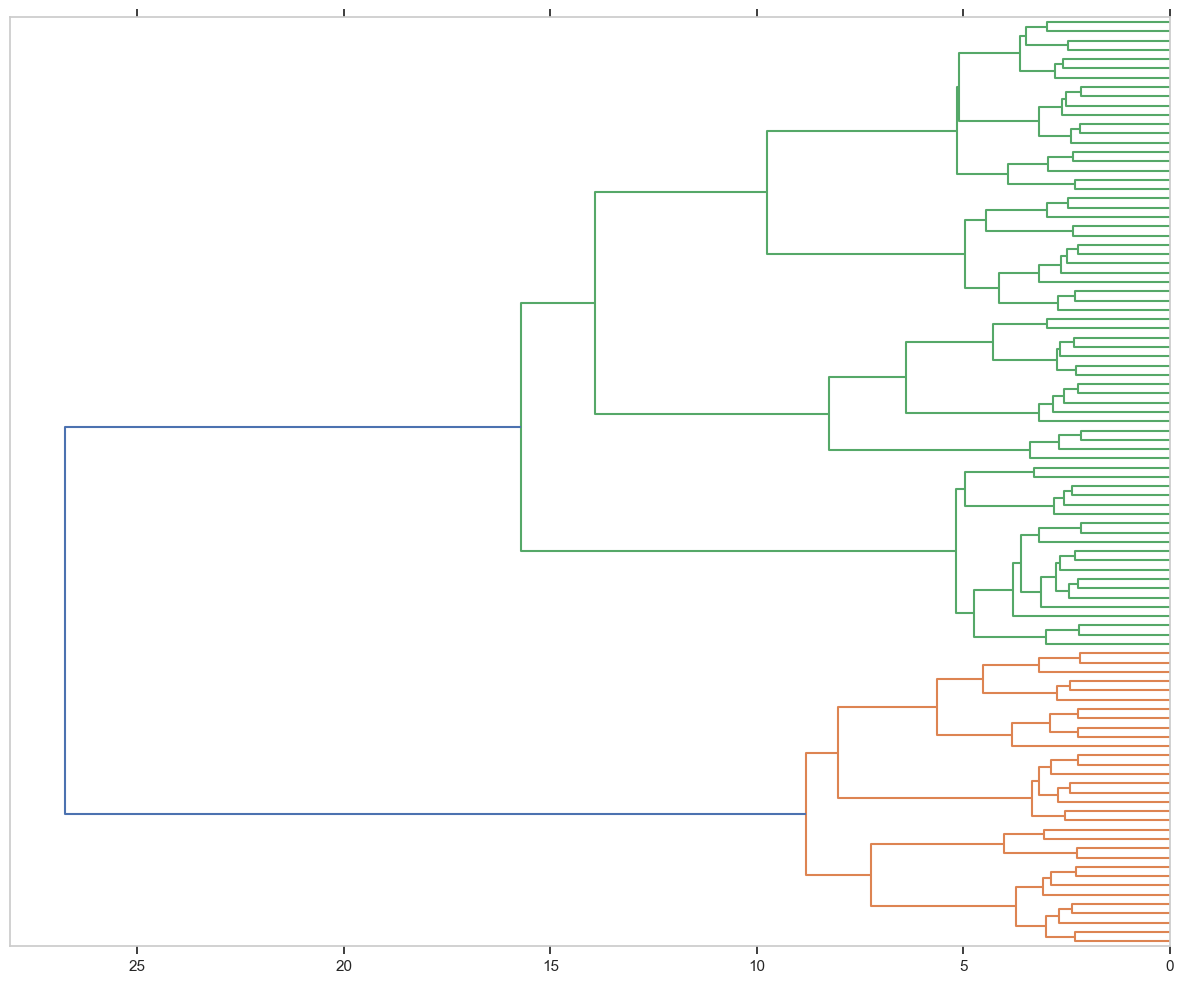

In [159]:
# Curious: Ward Hierarchical Clustering
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity
def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

def plot_hierarchical_clusters(linkage_matrix, data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    title = data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=title,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: title[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('day_hierachical_clusters.png', dpi=200)
                      
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           data=df,
                           figure_size=(12, 10))

# Unfortunately, the days clustered were not titled ); this is even more difficult to interpret

## To conclude, we will just use K-means clustering now to make sense the data